In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import api
import scipy
from matplotlib import rc
rc("text", usetex=False)

grid = api.init_grid(xlim=(0, 1), ylim=(0, 1), step=0.02, nb_pts=1000)

<IPython.core.display.Javascript object>


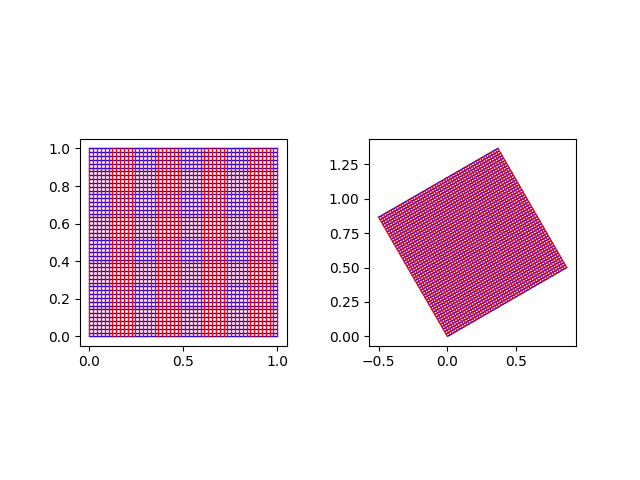

(<AxesSubplot:>, <AxesSubplot:>)

In [48]:
rotation = lambda z: z * np.exp(1j * np.pi / 6)
api.plot_map(grid, rotation)

<IPython.core.display.Javascript object>


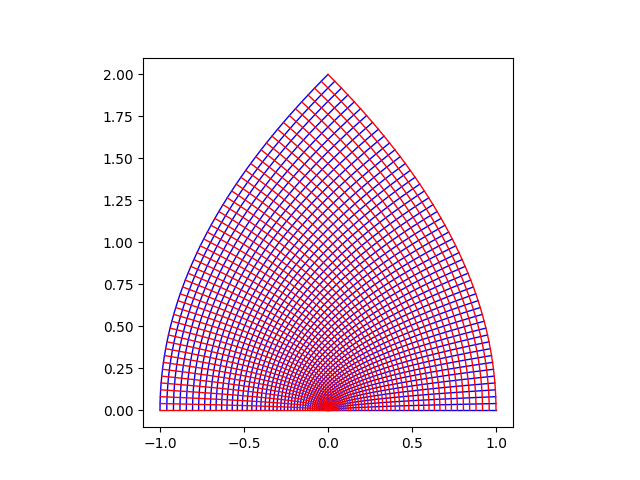

<AxesSubplot:>

In [49]:
rotation = lambda z: z ** 2
api.plot_map(grid, rotation, plot_domain=False)

<IPython.core.display.Javascript object>


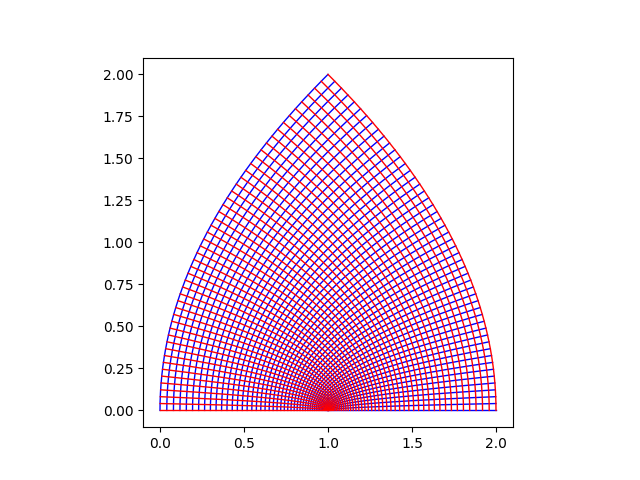

<AxesSubplot:>

In [50]:
rotation = lambda z: z ** 2 + 1
api.plot_map(grid, rotation, plot_domain=False)

<IPython.core.display.Javascript object>


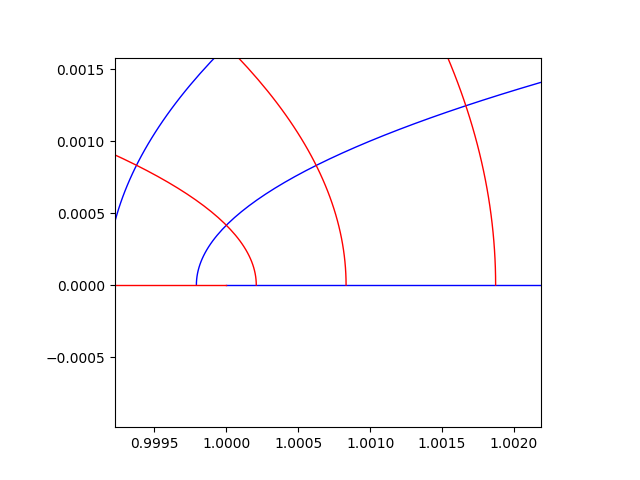

<AxesSubplot:>

In [51]:
rotation = lambda z: (z ** 2 + 1) ** 0.5
api.plot_map(grid, rotation, plot_domain=False)